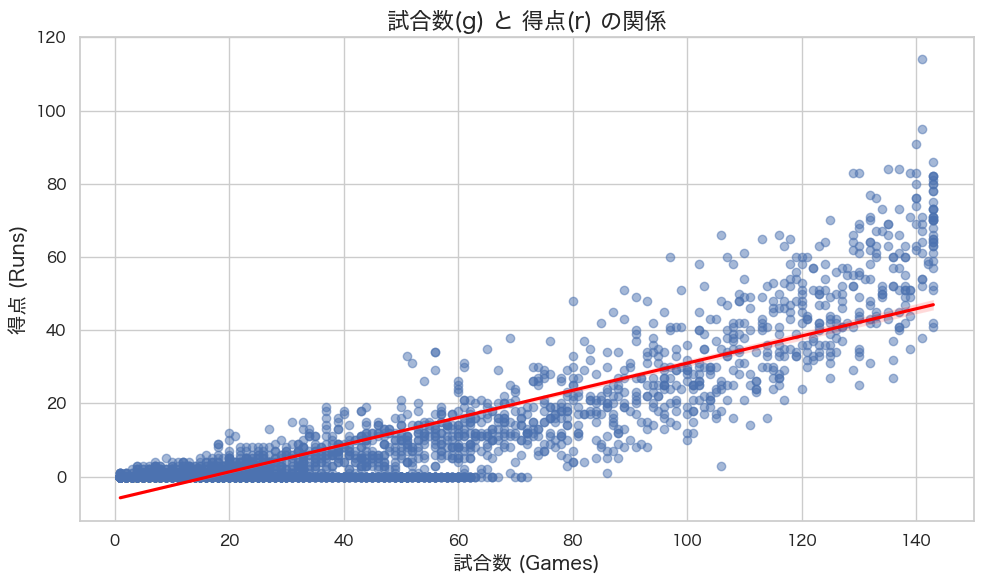

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('stats_bat.csv', encoding='cp932')

sns.set(style="whitegrid")

plt.rcParams['font.family'] = 'Hiragino Sans'

plt.figure(figsize=(10, 6))

sns.regplot(data=df, x='g', y='r', 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

plt.title('試合数(g) と 得点(r) の関係', fontsize=16)
plt.xlabel('試合数 (Games)', fontsize=14)
plt.ylabel('得点 (Runs)', fontsize=14)

plt.tight_layout()
plt.show()

In [7]:

df['R_per_G'] = df['r'] / df['g']

top_scorers = df[df['g'] >= 50].sort_values('R_per_G', ascending=False).head(5)
print(top_scorers[['player_name', 'team_name', 'g', 'r', 'R_per_G']])

     player_name team_name    g    r   R_per_G
780        村上　宗隆      ヤクルト  141  114  0.808511
588        柳田　悠岐    ソフトバンク  141   95  0.673759
265        近本　光司        阪神  140   91  0.650000
1502       塩見　泰隆      ヤクルト   51   33  0.647059
1666       近本　光司        阪神  129   83  0.643411


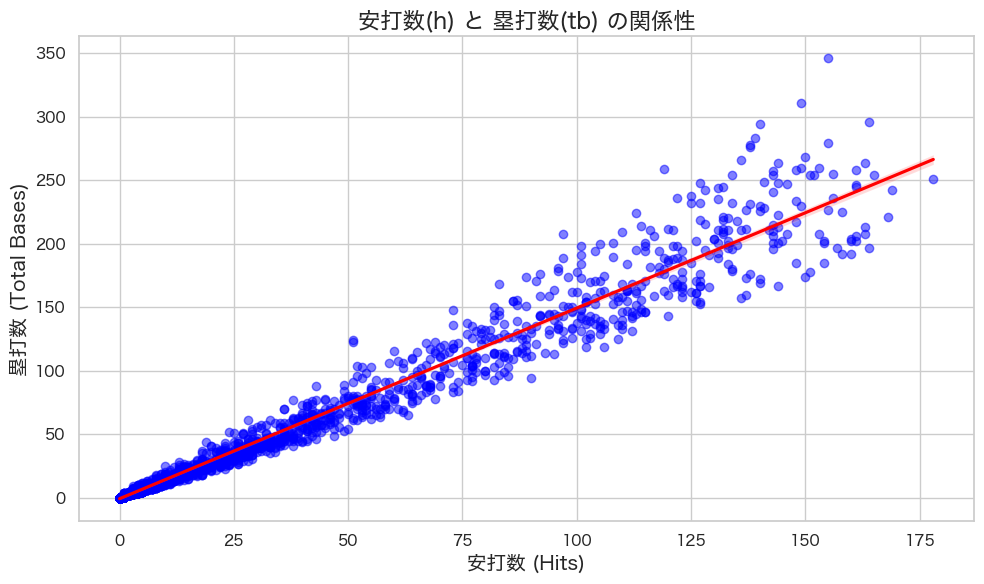

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('stats_bat.csv', encoding='cp932')

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Hiragino Sans'

plt.figure(figsize=(10, 6))

sns.regplot(data=df, x='h', y='tb', 
            scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
            line_kws={'color': 'red'})

plt.title('安打数(h) と 塁打数(tb) の関係性', fontsize=16)
plt.xlabel('安打数 (Hits)', fontsize=14)
plt.ylabel('塁打数 (Total Bases)', fontsize=14)

plt.tight_layout()
plt.show()

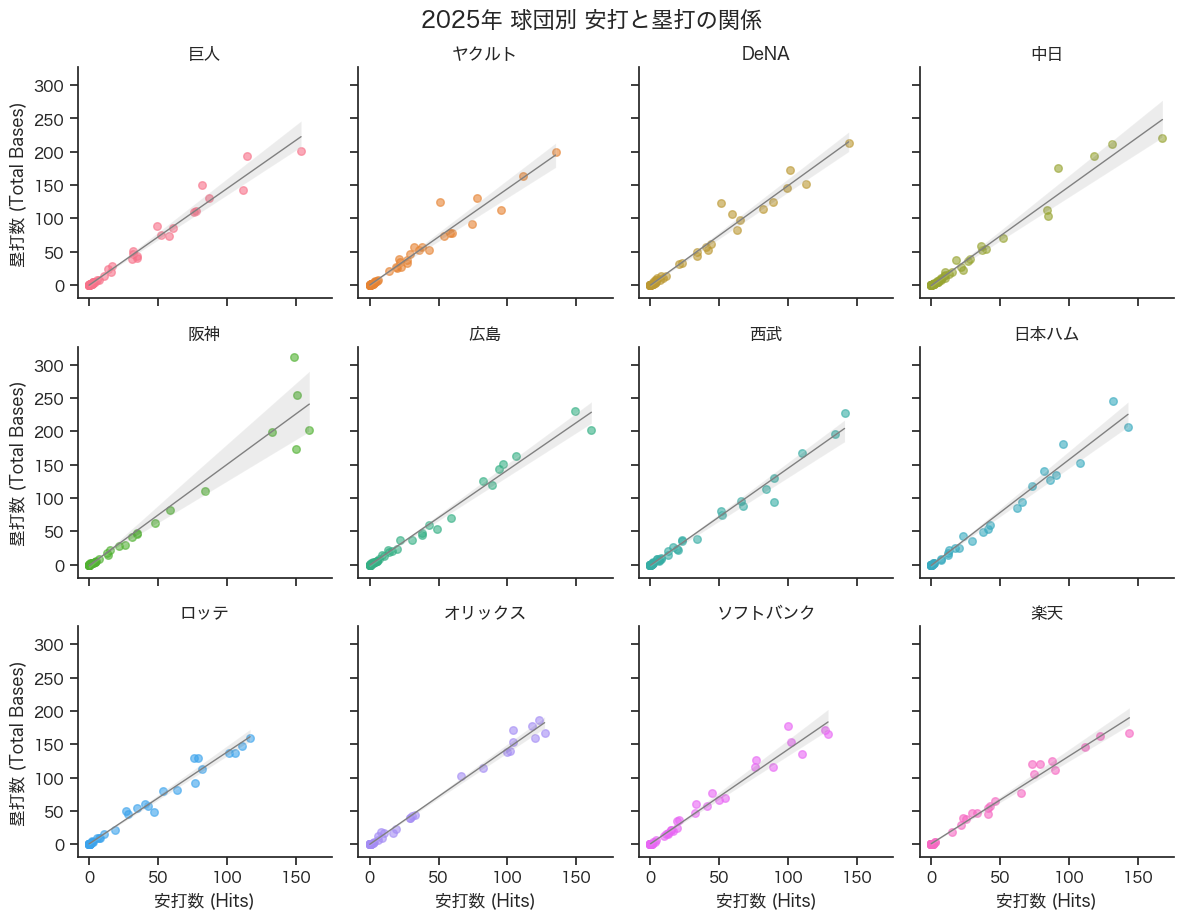

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('stats_bat.csv', encoding='cp932')

latest_year = df['season_year'].max()
df_current = df[df['season_year'] == latest_year]

sns.set(style="ticks")
plt.rcParams['font.family'] = 'Hiragino Sans'

lm = sns.lmplot(data=df_current, x='h', y='tb', col='team_name', hue='team_name',
                col_wrap=4, height=3, aspect=1,
                scatter_kws={'alpha': 0.6, 's': 30}, 
                line_kws={'color': 'gray', 'linewidth': 1}) 

lm.set_titles("{col_name}") 
lm.set_axis_labels("安打数 (Hits)", "塁打数 (Total Bases)")
lm.fig.suptitle(f'{latest_year}年 球団別 安打と塁打の関係', y=1.02, fontsize=16)

plt.show()

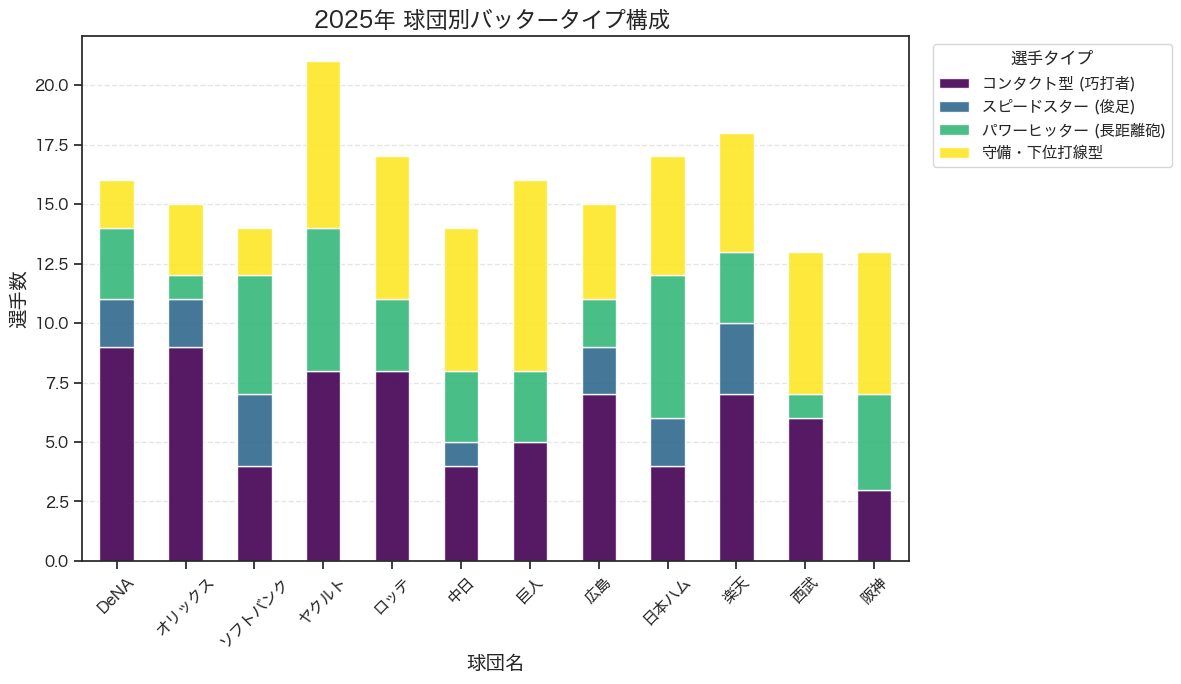

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

try:
    df = pd.read_csv('stats_bat.csv', encoding='cp932')
except:
    df = pd.read_csv('stats_bat.csv')

latest_year = df['season_year'].max()
df = df[df['season_year'] == latest_year].copy()

df = df[df['pa'] >= 100].copy()

df['AVG'] = df['h'] / df['ab']
df['ISO'] = (df['tb'] - df['h']) / df['ab']
df['BB_pct'] = df['bb'] / df['pa']
df['K_pct'] = df['so'] / df['pa']
df['SB_per_PA'] = df['sb'] / df['pa']
df = df.fillna(0)

features = ['AVG', 'ISO', 'BB_pct', 'K_pct', 'SB_per_PA']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_means = df.groupby('cluster')[features].mean()

def get_label(row):
    if row['SB_per_PA'] > 0.04: return 'スピードスター (俊足)'
    if row['ISO'] > 0.15: return 'パワーヒッター (長距離砲)'
    if row['AVG'] > 0.25 and row['K_pct'] < 0.18: return 'コンタクト型 (巧打者)'
    return '守備・下位打線型'

labels = {}
for i, row in cluster_means.iterrows():
    labels[i] = get_label(row)

df['type_name'] = df['cluster'].map(labels)

plt.rcParams['font.family'] = 'Hiragino Sans' 

team_comp = pd.crosstab(df['team_name'], df['type_name'])

ax = team_comp.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis', alpha=0.9)

plt.title(f'{latest_year}年 球団別バッタータイプ構成 ', fontsize=16)
plt.xlabel('球団名', fontsize=14)
plt.ylabel('選手数', fontsize=14)
plt.legend(title='選手タイプ', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()